In [1]:
from numpy import arange, zeros, exp
import matplotlib.pyplot as plt

In [2]:
C = 100e-12 #F
G = 10e-9   #S

V_r = -0.07    #V
V_L = -0.05   #V
delta_L = 0.002  #V

V_redef = -0.08    #V
V_pico = 0.05  #V

tau_u = 0.2  #s

a = 2e-9    #S
b = 20e-12  #A

dt = 1e-6   #s
tmax = 3    #s

V0 = V_L
u0 = 0

N = round(tmax / dt)   # numero de interacoes

In [3]:
def corrente(I, t, ti, tf):
    return  I*(t>=ti)-I*(t>=tf)


def dVdt(V, u, I):
    return ( G * (V_r - V + delta_L * exp( (V-V_L)/delta_L ) ) -u + I ) / C


def dudt(V, u, I):
    return ( a * (V - V_r) - u ) / tau_u


def euler(I):
    V = zeros(N)
    u = zeros(N)

    V[0] = V0
    u[0] = u0

    for i in range(N-1):
        if V[i] > V_pico:
            u[i] = u[i] + b
            V[i] = V_redef

        u[i+1] = u[i] + dt * dudt(V[i], u[i], I[i])
        V[i+1] = V[i] + dt * dVdt(V[i], u[i], I[i])

    return V, u

In [4]:
t = arange(0, tmax, dt)

I_inj = 221e-12 #A
I = corrente(I_inj, t, ti=0.5, tf=2.5)

V, u = euler(I)

In [5]:
plt.style.use('bmh')

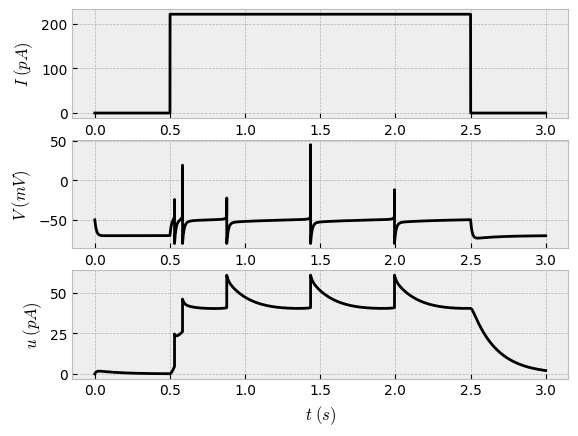

In [6]:
plt.figure()

plt.subplot(3,1,1)
plt.plot(t, I*1e12, 'k')
plt.ylabel(r'$I \; (pA)$')

plt.subplot(3,1,2)
plt.plot(t, V*1e3, 'k')
plt.ylabel(r'$V \; (mV)$')

plt.subplot(3,1,3)
plt.plot(t, u*1e12, 'k')
plt.ylabel(r'$u \; (pA)$')
plt.xlabel(r'$t \; (s)$')

plt.show()